In [1]:
import pandas as pd
df = pd.read_csv("netflix.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [2]:
# Check data types and non-null counts
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [3]:
# Check for missing values
print(df.isnull().sum())


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [4]:
#statistics
print(df.describe())


       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [5]:
#remving the null values
df.dropna(subset=['director', 'cast', 'country','rating','duration'], inplace=True)


In [6]:
#checking for null after the update
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [7]:
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

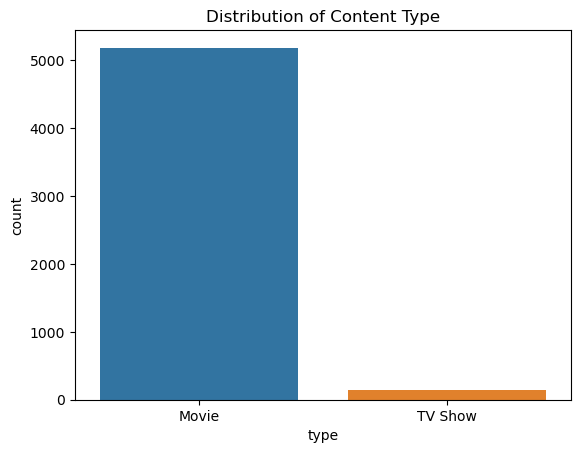

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of movies and TV shows
sns.countplot(data=df, x='type')
plt.title('Distribution of Content Type')
plt.show()


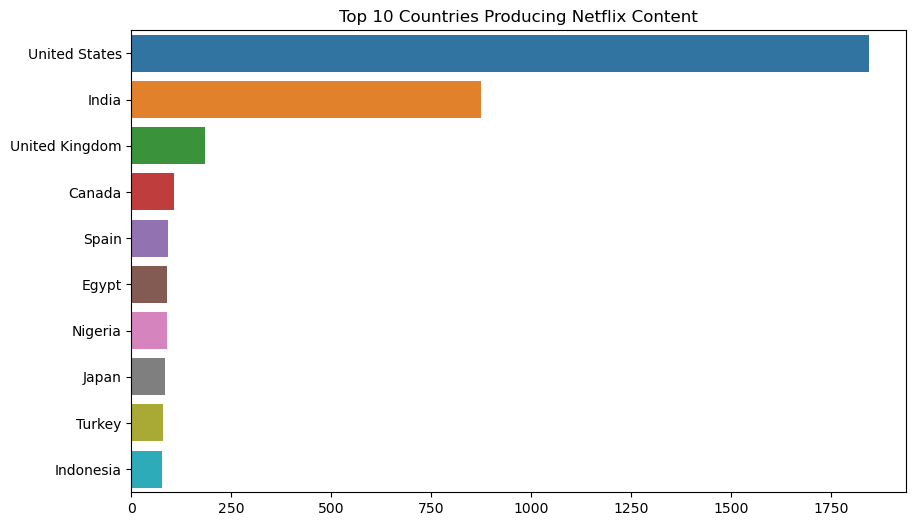

In [9]:
# Top 10 countries by number of titles
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries Producing Netflix Content')
plt.show()



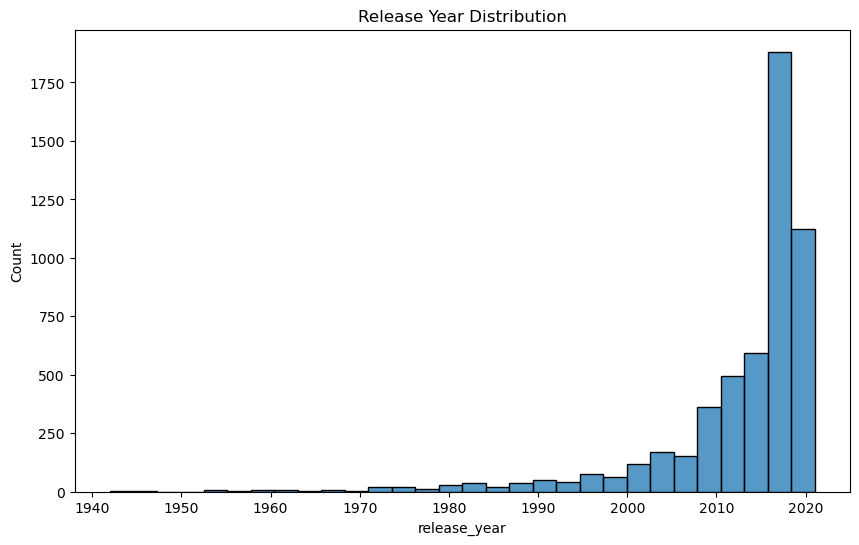

In [10]:
# Release year distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['release_year'], bins=30, kde=False)
plt.title('Release Year Distribution')
plt.show()


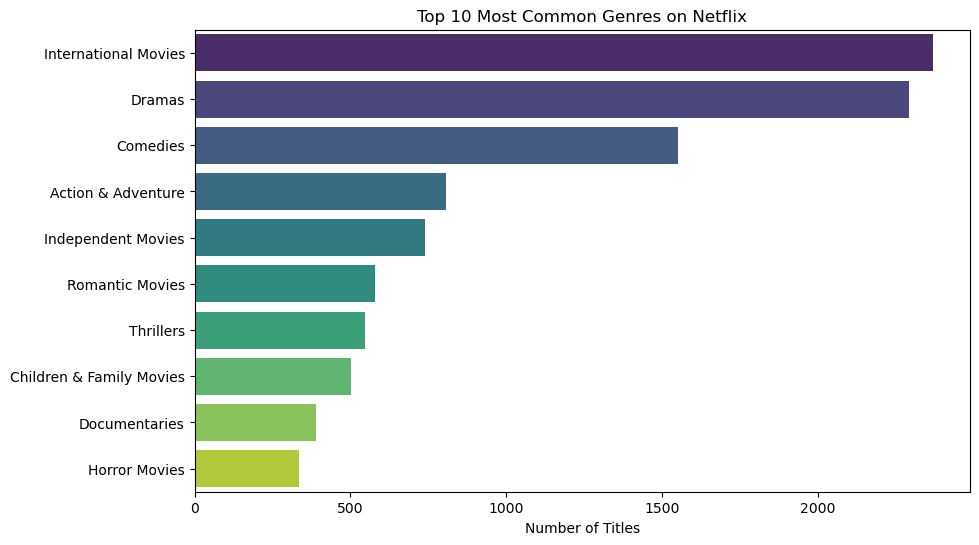

In [11]:
# Splitting genres
df['genres'] = df['listed_in'].apply(lambda x: x.split(', '))
# Expanding the genres column into multiple rows
df_genres = df.explode('genres')

# Counting the most frequent genres
top_genres = df_genres['genres'].value_counts().head(10)

# Plotting the top 10 genres
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Number of Titles')
plt.show()


In [12]:
df['listed_in']

7       Dramas, Independent Movies, International Movies
8                           British TV Shows, Reality TV
9                                       Comedies, Dramas
12                          Dramas, International Movies
24       Comedies, International Movies, Romantic Movies
                              ...                       
8801             Dramas, International Movies, Thrillers
8802                      Cult Movies, Dramas, Thrillers
8804                             Comedies, Horror Movies
8805                  Children & Family Movies, Comedies
8806      Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 5332, dtype: object

In [13]:
df['genres']

7       [Dramas, Independent Movies, International Mov...
8                          [British TV Shows, Reality TV]
9                                      [Comedies, Dramas]
12                         [Dramas, International Movies]
24      [Comedies, International Movies, Romantic Movies]
                              ...                        
8801            [Dramas, International Movies, Thrillers]
8802                     [Cult Movies, Dramas, Thrillers]
8804                            [Comedies, Horror Movies]
8805                 [Children & Family Movies, Comedies]
8806     [Dramas, International Movies, Music & Musicals]
Name: genres, Length: 5332, dtype: object

In [14]:
df_genres

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genres
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Dramas
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Independent Movies
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",International Movies
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,British TV Shows
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,Reality TV
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Children & Family Movies
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Comedies
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Dramas
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,International Movies


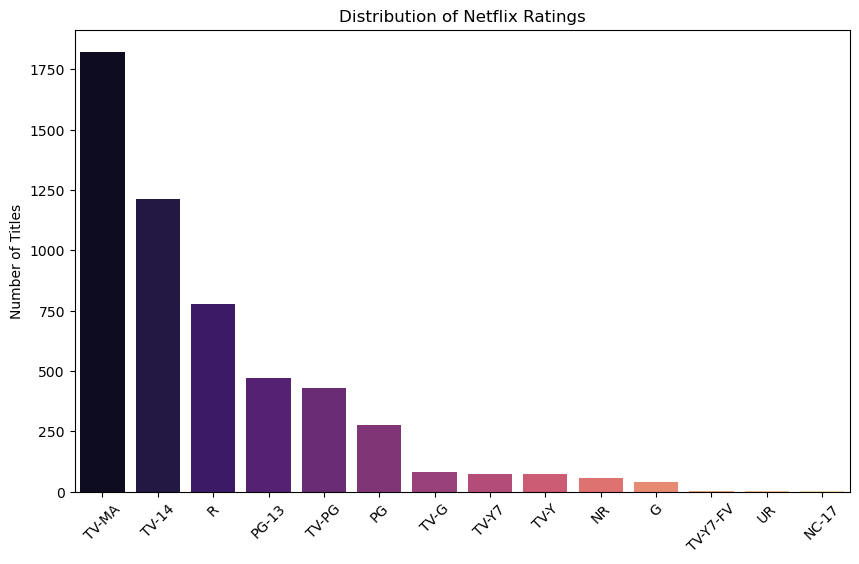

In [15]:
# Count the ratings
rating_counts = df['rating'].value_counts()

# Plotting the distribution of ratings
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='magma')
plt.title('Distribution of Netflix Ratings')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


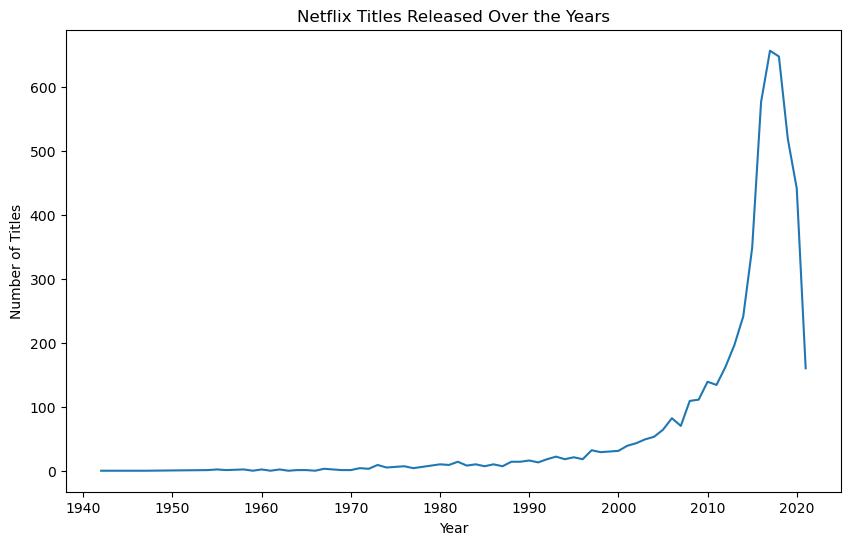

In [16]:
# Group by year of release
titles_per_year = df['release_year'].value_counts().sort_index()

# Plotting titles released per year
plt.figure(figsize=(10, 6))
sns.lineplot(x=titles_per_year.index, y=titles_per_year.values)
plt.title('Netflix Titles Released Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()


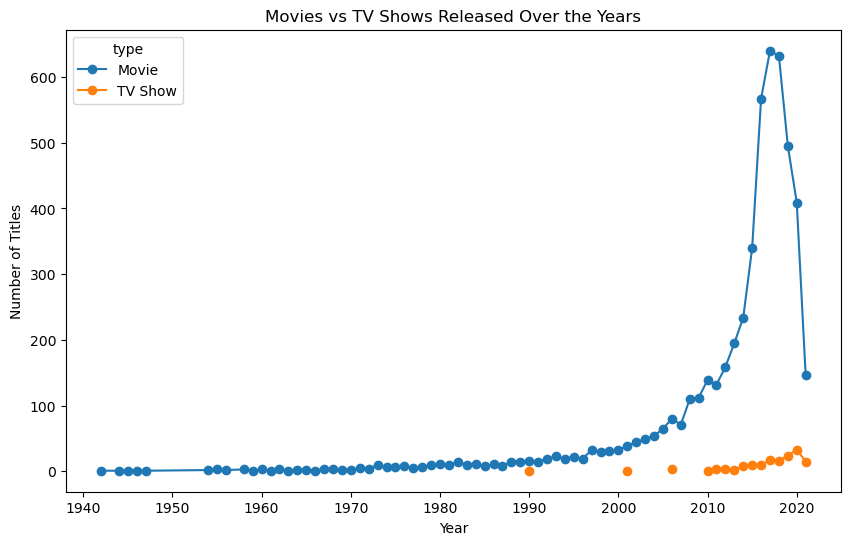

In [17]:
# Group by year and type (Movies or TV Shows)
type_by_year = df.groupby(['release_year', 'type']).size().unstack()

# Plotting movies vs TV shows released per year
type_by_year.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Movies vs TV Shows Released Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()


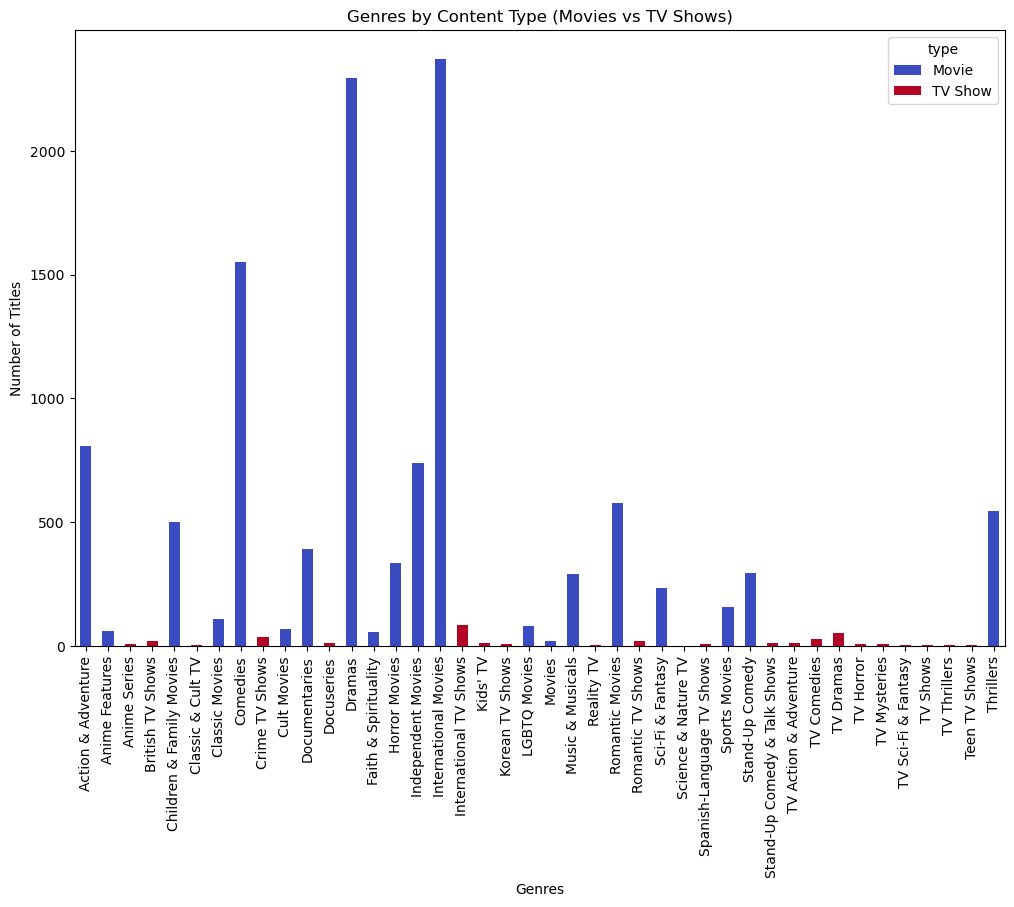

In [18]:
# Grouping genres by content type (Movies vs TV Shows)
genres_by_type = df_genres.groupby(['type', 'genres']).size().unstack(fill_value=0)

# Plotting a stacked bar plot to compare genres for Movies and TV Shows
genres_by_type.T.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='coolwarm')
plt.title('Genres by Content Type (Movies vs TV Shows)')
plt.ylabel('Number of Titles')
plt.xlabel('Genres')
plt.xticks(rotation=90)
plt.show()


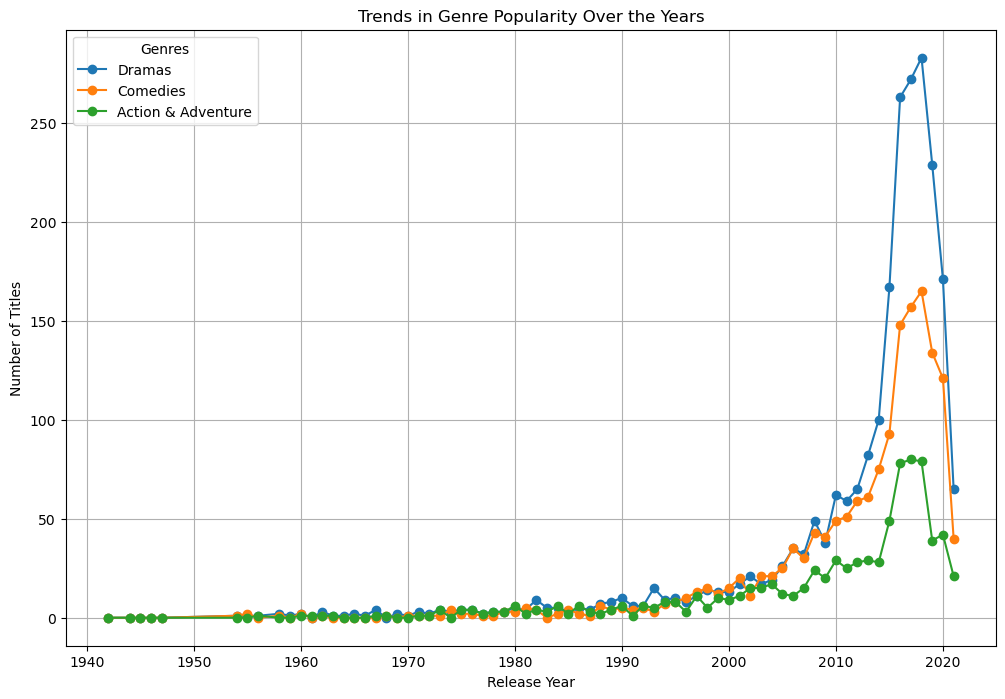

In [19]:
# Group by release year and genres
genres_by_year = df_genres.groupby(['release_year', 'genres']).size().unstack(fill_value=0)

# Select specific genres for analysis (e.g., Drama, Comedy, Action)
selected_genres = genres_by_year[['Dramas', 'Comedies', 'Action & Adventure']]

# Plot the trend of these genres over the years
selected_genres.plot(figsize=(12, 8), marker='o')
plt.title('Trends in Genre Popularity Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Genres')
plt.grid(True)
plt.show()


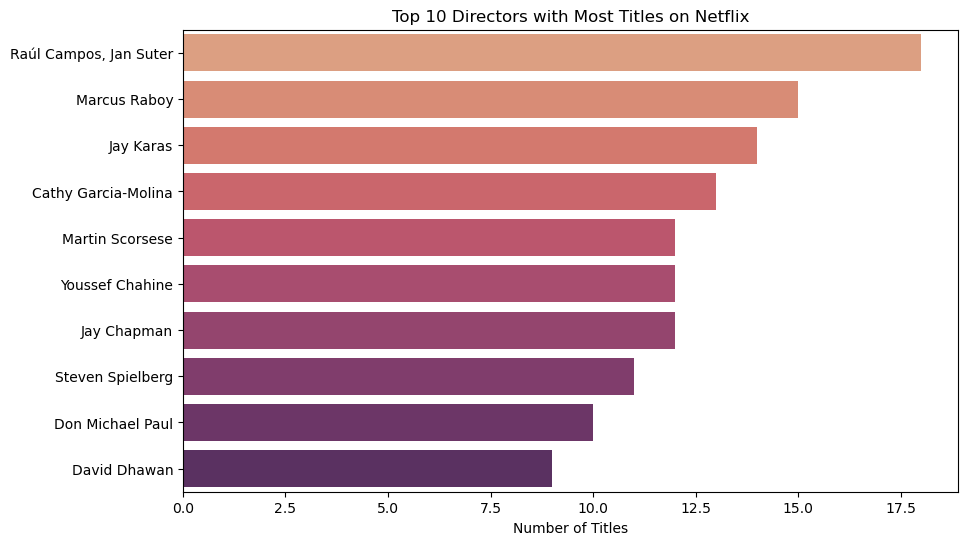

In [20]:
# Counting the most frequent directors
top_directors = df['director'].value_counts().head(10)

# Plotting the top 10 directors
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='flare')
plt.title('Top 10 Directors with Most Titles on Netflix')
plt.xlabel('Number of Titles')
plt.show()


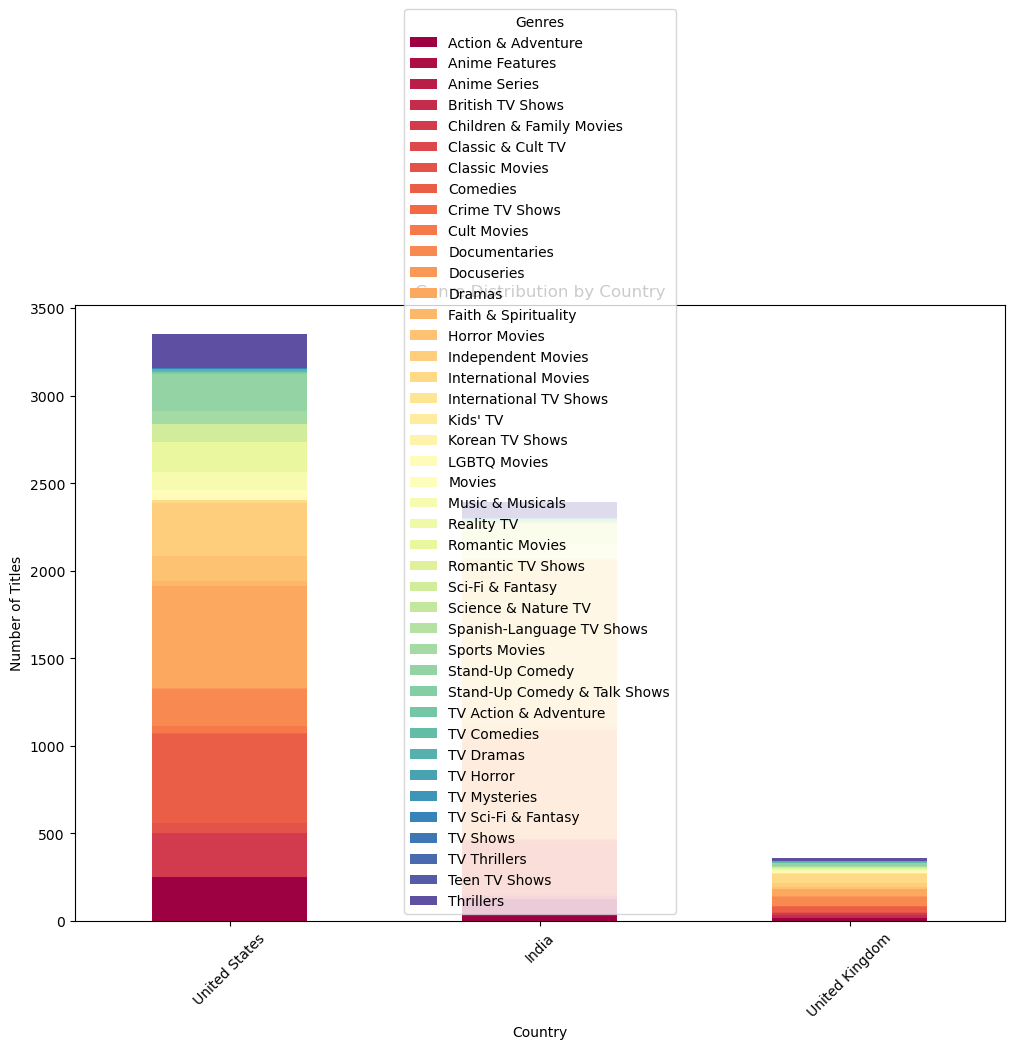

In [21]:
# Grouping by country and genres
genres_by_country = df_genres.groupby(['country', 'genres']).size().unstack(fill_value=0)

# Selecting a few countries to analyze (e.g., United States, India, United Kingdom)
selected_countries = genres_by_country.loc[['United States', 'India', 'United Kingdom']]

# Plotting
selected_countries.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Spectral')
plt.title('Genre Distribution by Country')
plt.ylabel('Number of Titles')
plt.xlabel('Country')
plt.legend(title='Genres')
plt.xticks(rotation=45)
plt.show()


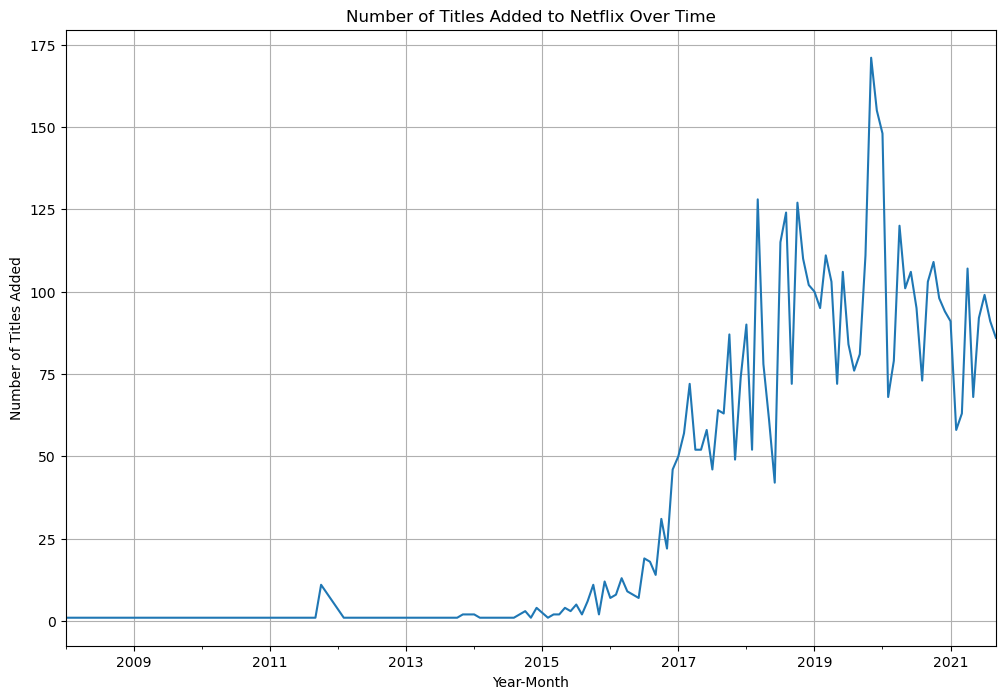

In [22]:
# Group by the month and year of date_added
df['year_month_added'] = df['date_added'].dt.to_period('M')
content_by_month = df.groupby('year_month_added').size()

# Plotting the time series of content additions over time
plt.figure(figsize=(12, 8))
content_by_month.plot()
plt.title('Number of Titles Added to Netflix Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.show()


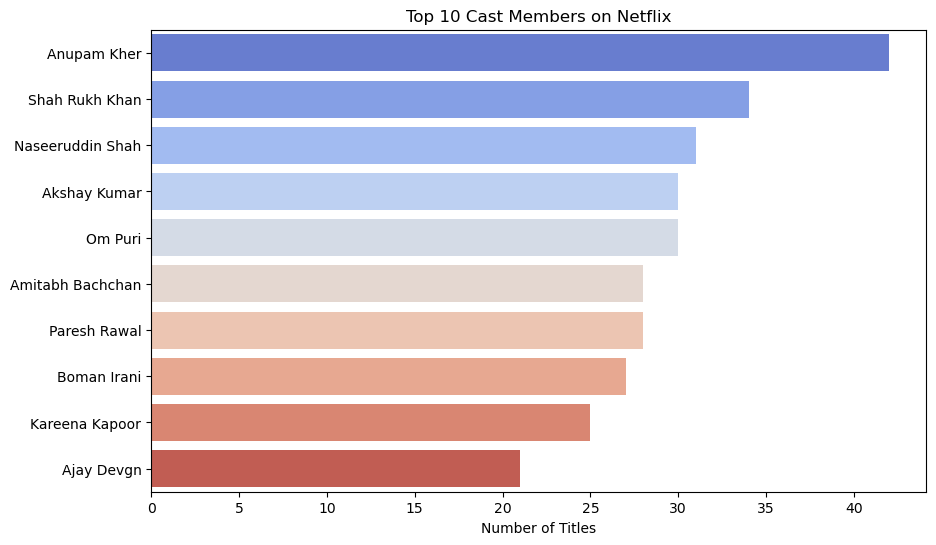

In [23]:
# Splitting cast members
df['cast_list'] = df['cast'].fillna('').apply(lambda x: x.split(', '))

# Expanding the cast column
df_cast = df.explode('cast_list')

# Counting the most frequent cast members
top_cast = df_cast['cast_list'].value_counts().head(10)

# Plotting the top cast members
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cast.values, y=top_cast.index, palette='coolwarm')
plt.title('Top 10 Cast Members on Netflix')
plt.xlabel('Number of Titles')
plt.show()


/var/folders/4h/1d34mwbn5ss7rfp28lvh5jk00000gn/T/ipykernel_68116/896704213.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['duration'] = movies_df['duration'].str.replace(' min', '').astype(int)


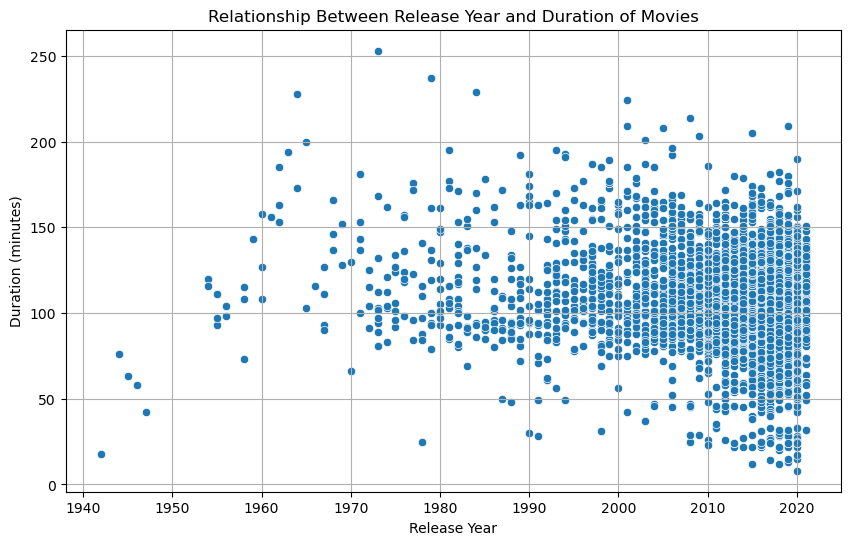

In [24]:
# Filter for only movies
movies_df = df[df['type'] == 'Movie']

# Convert duration to numeric (for movies it's in minutes)
movies_df['duration'] = movies_df['duration'].str.replace(' min', '').astype(int)

# Plotting a scatter plot of release year vs duration
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies_df, x='release_year', y='duration')
plt.title('Relationship Between Release Year and Duration of Movies')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.grid(True)
plt.show()
